In [1]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sqlite3

In [2]:
# maximum number of rows to display
pd.options.display.max_rows = 50

**Connecting to the database**

In [3]:
conn = sqlite3.connect('sqlite-sakila.db')

We can now query the database directly in this environment using pandas' read_sql method. We will first see what tables are available in the dataset. This can be done by accessing the sqlite_master table, which is a table containing the information about the database schema. 

In [9]:
# Looking at the all tables preset in our database 
tables = pd.read_sql('''
                        select * 
                        from sqlite_master
                        where type = 'table' ''',conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,actor,actor,2,CREATE TABLE actor (\n actor_id numeric NOT N...
1,table,country,country,5,CREATE TABLE country (\n country_id SMALLINT ...
2,table,city,city,7,"CREATE TABLE city (\n city_id int NOT NULL,\n..."
3,table,address,address,10,CREATE TABLE address (\n address_id int NOT N...
4,table,language,language,13,CREATE TABLE language (\n language_id SMALLIN...
5,table,category,category,15,CREATE TABLE category (\n category_id SMALLIN...
6,table,customer,customer,19,CREATE TABLE customer (\n customer_id INT NOT...
7,table,film,film,24,"CREATE TABLE film (\n film_id int NOT NULL,\n..."
8,table,film_actor,film_actor,28,CREATE TABLE film_actor (\n actor_id INT NOT ...
9,table,film_category,film_category,33,CREATE TABLE film_category (\n film_id INT NO...


In [10]:
# accessing the record of actor table
pd.read_sql('''
    select * 
    from actor;''',conn)

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2,NICK,WAHLBERG,2021-03-06 15:51:59
2,3,ED,CHASE,2021-03-06 15:51:59
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59
...,...,...,...,...
195,196,BELA,WALKEN,2021-03-06 15:52:00
196,197,REESE,WEST,2021-03-06 15:52:00
197,198,MARY,KEITEL,2021-03-06 15:52:00
198,199,JULIA,FAWCETT,2021-03-06 15:52:00


In [12]:
# Aceessing the records of film table 
pd.read_sql('''
    select *
    from film''',conn).head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [13]:
# Accessing the specific columns from payment table
pd.read_sql('''
    select 
    payment_id,
    payment_date,
    amount 
    from payment''',conn)

,payment_id,payment_date,amount
0,1,2005-05-25 11:30:37.000,2.99
1,2,2005-05-28 10:35:23.000,0.99
2,3,2005-06-15 00:54:12.000,5.99
3,4,2005-06-15 18:02:53.000,0.99
4,5,2005-06-15 21:08:46.000,9.99
...,...,...,...
16044,16045,2005-08-21 17:43:42.000,4.99
16045,16046,2005-08-21 21:41:57.000,1.99
16046,16047,2005-08-23 06:09:44.000,8.99
16047,16048,2005-08-23 11:08:46.000,2.99


In [17]:
pd.read_sql('''
    select count(*) as 'Total_no_rows'
    from payment''',conn)

,Total_no_rows
0,16049


* so we can say that the payment table contains 16049 rows 
* now let's have a look on the specific column of payment table 

In [18]:
pd.read_sql('''
    select count(rental_id)
    from payment''',conn)

,count(rental_id)
0,16044


* In this case the total rows is lesser than the previous case.
* beacuse count doesnot include the null value into the counting.

In [24]:
# now retriveing the data where rental_id is null in payment table 

pd.read_sql('''
    select *
    from payment 
    where rental_id is NULL''',conn)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,424,16,1,None,1.99,2005-06-18 04:56:12.000,2021-03-06 15:56:00
1,7011,259,2,None,1.99,2005-08-23 06:13:16.000,2021-03-06 15:56:55
2,10840,401,1,None,0.99,2005-07-12 06:26:10.000,2021-03-06 15:57:27
3,14675,546,1,None,3.99,2005-07-30 21:16:20.000,2021-03-06 15:57:58
4,15458,577,2,None,0.99,2005-05-27 00:46:39.000,2021-03-06 15:58:04


* So, the payment table containg 5 rows where the rental_id is null

In [28]:
# Count the number of the movies which are currently
# rented out 

pd.read_sql('''
        select count(*) as 'Total_rented_out_movies'
        from rental
        where return_date is null''',conn)

,Total_rented_out_movies
0,183


In [30]:
# looking at the film table dataset 
pd.read_sql('''
    select * 
    from film''',conn).head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00


**MIN(), MAX(), AVERAGE() and Aggregation**

In [31]:
# calculating the min and max movie length
pd.read_sql('''
        select min(length),max(length)
        from film
        where rating  = 'PG' ''',conn)

,min(length),max(length)
0,46,185


* In the film table the minimum and maximum length of the movie is 46 and 185 respectively

In [36]:
# Calulating the min, max, avg length of movie using group by function

pd.read_sql('''
    select rating,
    min(length),
    max(length),
    round(avg(length)) as Average
    from film
    group by rating''',conn)

,rating,min(length),max(length),Average
0,G,47,185,111.0
1,NC-17,46,184,113.0
2,PG,46,185,112.0
3,PG-13,46,185,120.0
4,R,49,185,119.0


**How many movies are there in each rating category?**

In [41]:
pd.read_sql('''
    select rating,
    count(*) as 'no of movies'
    from film
    group by rating
    order by count(*) desc''',conn)

,rating,no of movies
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


In [42]:
import seaborn as sns

In [43]:
df = pd.read_sql('''
    select rating,
    count(*) as 'no of movies'
    from film
    group by rating
    order by count(*) desc''',conn)

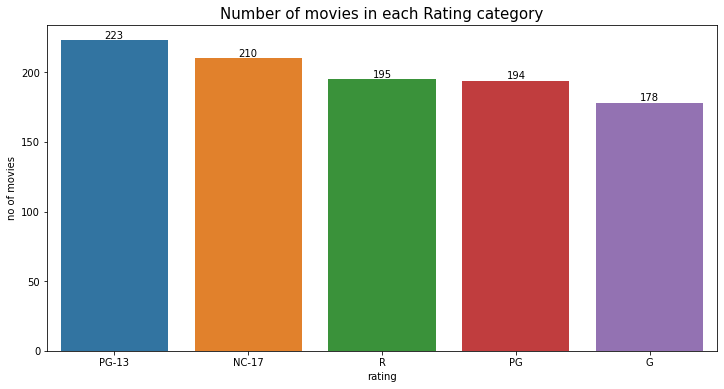

In [48]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x= 'rating' , y= 'no of movies',data = df)
ax.bar_label(ax.containers[0])
plt.title('Number of movies in each Rating category',fontsize = 15)
plt.show()

**What is the total number of movies in each category held in inventory?**

In [49]:
# looking at the inventory table dataset
pd.read_sql('''
    select * 
    from inventory''',conn).head(2)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08


In [51]:
pd.read_sql('''
    select rating,
    count(*) as 'no of movies in inventory'
    from 
    inventory as i
    inner join
    film as f
    on i.film_id = f.film_id
    group by rating 
    order by count(*)
    ''',conn)

,rating,no of movies in inventory
0,G,791
1,R,904
2,PG,924
3,NC-17,944
4,PG-13,1018


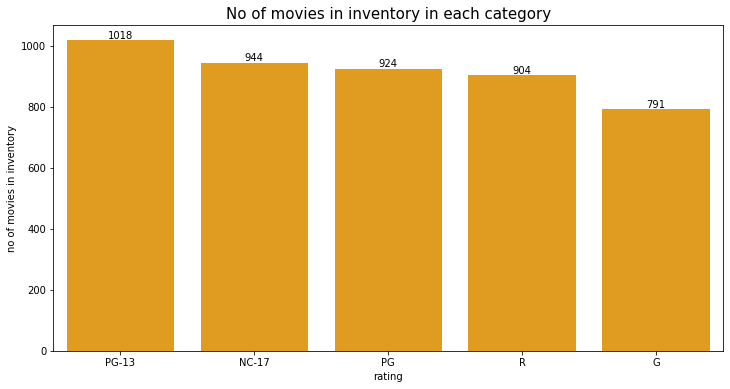

In [60]:
# plotting the above data 

df = pd.read_sql('''
    select rating,
    count(*) as 'no of movies in inventory'
    from 
    inventory as i
    inner join
    film as f
    on i.film_id = f.film_id
    group by rating 
    order by count(*) desc
    ''',conn)

plt.figure(figsize = (12,6))
ax = sns.barplot(x = 'rating', y ='no of movies in inventory',data  = df , color= 'orange')
ax.bar_label(ax.containers[0])
plt.title('No of movies in inventory in each category',fontsize = 15)
plt.show()

**Which movies of rating 'PG' are held in highest quantity in the inventory?**

In [61]:
pd.read_sql('''
    select * 
    from inventory''',conn).head(2)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08


In [73]:
pd.read_sql('''
    select title,rating ,
    count(*) as 'no of movies'
    from inventory i
    inner join
    film  f
    on i.film_id = f.film_id
    where rating == 'PG'
    group by title
    order by count(*) desc,title asc  ''',conn)

,title,rating,no of movies
0,ACADEMY DINOSAUR,PG,8
1,BOUND CHEAPER,PG,8
2,BUCKET BROTHERHOOD,PG,8
3,EXPENDABLE STALLION,PG,8
4,FROST HEAD,PG,8
...,...,...,...
178,PRIVATE DROP,PG,2
179,PUNK DIVORCE,PG,2
180,RECORDS ZORRO,PG,2
181,TEQUILA PAST,PG,2


**What movies has each actor starred in and who has starred in the most movies?**

In [97]:
pd.read_sql('''
    select * 
    from film_actor fa
    inner join
    film f
    on fa.film_id = f.film_id''',conn).head(2)

,actor_id,film_id,last_update,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,1,2021-03-06 15:52:45,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,1,23,2021-03-06 15:52:45,23,ANACONDA CONFESSIONS,A Lacklusture Display of a Dentist And a Denti...,2006,1,None,3,0.99,92,9.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [105]:
# movie title with their starring actor name 
pd.read_sql('''
    select title,
    first_name || ' ' || last_name AS Name,
    
    
    from
    (select * 
    from film_actor fa
    inner join
    film f
    on fa.film_id = f.film_id) as t1
    inner join 
    actor as a
    on t1.actor_id = a.actor_id''',conn)

,title,Name
0,ACADEMY DINOSAUR,PENELOPE GUINESS
1,ANACONDA CONFESSIONS,PENELOPE GUINESS
2,ANGELS LIFE,PENELOPE GUINESS
3,BULWORTH COMMANDMENTS,PENELOPE GUINESS
4,CHEAPER CLYDE,PENELOPE GUINESS
...,...,...
5457,TELEGRAPH VOYAGE,THORA TEMPLE
5458,TROJAN TOMORROW,THORA TEMPLE
5459,VIRGINIAN PLUTO,THORA TEMPLE
5460,WARDROBE PHANTOM,THORA TEMPLE


In [119]:
# Calculating the number of the movies starred by each actor and also most movies starred by  the actor 
pd.read_sql('''
    select 
    first_name || ' ' || last_name AS Name,
    count(title) as 'no of movies starred'
    
    
    from
    (select * 
    from film_actor fa
    inner join
    film f
    on fa.film_id = f.film_id) as t1
    inner join 
    actor as a
    on t1.actor_id = a.actor_id
    group by title
    order by count(title) desc  ''',conn)

,Name,no of movies starred
0,WOODY HOFFMAN,15
1,JENNIFER DAVIS,13
2,HELEN VOIGHT,13
3,NICK WAHLBERG,13
4,SISSY SOBIESKI,13
...,...,...
992,SISSY SOBIESKI,1
993,MARY KEITEL,1
994,CARY MCCONAUGHEY,1
995,ANGELA HUDSON,1


**Calculate only actors who have starred in movies more than 10 times.** 

In [120]:
pd.read_sql('''
    select 
    first_name || ' ' || last_name AS Name,
    count(title) as 'no of movies starred'
    
    
    from
    (select * 
    from film_actor fa
    inner join
    film f
    on fa.film_id = f.film_id) as t1
    inner join 
    actor as a
    on t1.actor_id = a.actor_id
    group by title
    having count(title)>10
    order by count(title) desc  ''',conn)

,Name,no of movies starred
0,WOODY HOFFMAN,15
1,JENNIFER DAVIS,13
2,HELEN VOIGHT,13
3,NICK WAHLBERG,13
4,SISSY SOBIESKI,13
5,JOHNNY LOLLOBRIGIDA,13
6,ED CHASE,13
7,BETTE NICHOLSON,12
8,ELVIS MARX,12
9,RIP CRAWFORD,12


* So,in our dataset we are having 27 actors who have starred in more than 10 movies 

In [129]:
pd.read_sql('''
    select * 
    from rental r''',conn).head(1)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41


In [130]:
pd.read_sql('''
    select *
    from inventory i''',conn).head(1)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08


In [162]:
pd.read_sql('''

SELECT
    r.rental_id AS Rental_ID
    ,f.title AS Title
    ,strftime('%Y-%m-%d', r.rental_date) AS Rent
    ,strftime('%Y-%m-%d', r.return_date) AS Return
    ,ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) AS HoldPeriod
    ,f.rental_duration AS RentalDuration
FROM rental AS r
JOIN inventory AS i ON r.inventory_id = i.inventory_id
JOIN film AS f ON i.film_id = f.film_id
WHERE r.return_date IS NOT NULL;''',conn)

,Rental_ID,Title,Rent,Return,HoldPeriod,RentalDuration
0,1,BLANKET BEVERLY,2005-05-24,2005-05-26,1.97,7
1,2,FREAKY POCUS,2005-05-24,2005-05-28,3.87,7
2,3,GRADUATE LORD,2005-05-24,2005-06-01,7.96,7
3,4,LOVE SUICIDES,2005-05-24,2005-06-03,9.11,6
4,5,IDOLS SNATCHERS,2005-05-24,2005-06-02,8.23,5
...,...,...,...,...,...,...
15856,16045,COMANCHEROS ENEMY,2005-08-23,2005-08-25,2.06,5
15857,16046,VOYAGE LEGALLY,2005-08-23,2005-08-27,3.82,6
15858,16047,ILLUSION AMELIE,2005-08-23,2005-08-25,1.17,4
15859,16048,HUNCHBACK IMPOSSIBLE,2005-08-23,2005-08-31,7.95,4


* Simply going over the results for HoldPeriod and RentalDuration, we can see that there have been overdue rentals.

In [166]:
pd.read_sql('''

SELECT
    r.rental_id AS Rental_ID
    ,c.last_name || ', ' || c.first_name AS Name
    ,c.email
    ,f.title AS Title
    ,ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date)-f.rental_duration,2) AS Overdue_days
FROM rental AS r
JOIN inventory AS i ON r.inventory_id = i.inventory_id
JOIN film AS f ON i.film_id = f.film_id
join customer as c on r.customer_id = c.customer_id
WHERE r.return_date IS NOT NULL
AND Overdue_days >0''',conn)

,Rental_ID,Name,email,Title,Overdue_days
0,3,"MURRELL, MANUEL",MANUEL.MURRELL@sakilacustomer.org,GRADUATE LORD,0.96
1,4,"PURDY, ANDREW",ANDREW.PURDY@sakilacustomer.org,LOVE SUICIDES,3.11
2,5,"HANSEN, DELORES",DELORES.HANSEN@sakilacustomer.org,IDOLS SNATCHERS,3.23
3,7,"WALTERS, CASSANDRA",CASSANDRA.WALTERS@sakilacustomer.org,SWARM GOLD,0.89
4,10,"ISOM, DANNY",DANNY.ISOM@sakilacustomer.org,HANGING DEEP,1.95
...,...,...,...,...,...
8101,16039,"WOOD, LORI",LORI.WOOD@sakilacustomer.org,CAPER MOTIONS,1.90
8102,16040,"SIMS, VANESSA",VANESSA.SIMS@sakilacustomer.org,SCORPION APOLLO,6.17
8103,16043,"SEAL, KARL",KARL.SEAL@sakilacustomer.org,STING PERSONAL,4.20
8104,16048,"HAMILTON, GLADYS",GLADYS.HAMILTON@sakilacustomer.org,HUNCHBACK IMPOSSIBLE,3.95


* By looking at the result we can say that a large number of rental have been overdue.

**Calculate the customer who have most overdue rental**

In [174]:
pd.read_sql("""

SELECT
    c.customer_id AS Customer_ID
    ,c.last_name || ', ' || c.first_name AS Name
    ,c.email
    ,COUNT(*) AS Overdue_Count
FROM rental AS r
JOIN inventory AS i ON r.inventory_id = i.inventory_id
JOIN film AS f ON i.film_id = f.film_id
JOIN customer AS c ON r.customer_id = c.customer_id
WHERE r.return_date IS NOT NULL
AND ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) - f.rental_duration > 0
GROUP BY Name
ORDER BY Overdue_Count DESC, Name ASC;

""", conn).head(3)

,Customer_ID,Name,email,Overdue_Count
0,295,"BATES, DAISY",DAISY.BATES@sakilacustomer.org,28
1,137,"KENNEDY, RHONDA",RHONDA.KENNEDY@sakilacustomer.org,27
2,526,"SEAL, KARL",KARL.SEAL@sakilacustomer.org,27


* From the above we get the result that BATES,DAISY haviing the most overdue count  

**Payments per rental, payments per date, payments per store**

Since we saw that there have been a lot of overdue rentals, let's now check if there have been extra payments or overdue taxes in cases when a movie has been returned after the maximum rental duration.

Here we use a LEFT JOIN because we want to return all payments even if for some reason they are not associated with a rental. Let's group by rental to see if there have been multiple payments for 1 rental:

In [184]:
pd.read_sql('''
    select p.rental_id,
    count(*) as payment_counts 
    from payment p
    LEFT JOIN rental r
    on p.rental_id = r.rental_id
    group by p.rental_id
    order by payment_counts desc''',conn)

,rental_id,payment_counts
0,NaN,5
1,16049.0,1
2,16048.0,1
3,16047.0,1
4,16046.0,1
...,...,...
16040,5.0,1
16041,4.0,1
16042,3.0,1
16043,2.0,1


* As we see, there haven't been multiple payments for one rental and hence no extra payment has been charged for overdue rentals. 

**calculate the total payments i.e. sales for each month.** 

In [187]:
pd.read_sql('''
    select *
    from payment''',conn).head(2)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57


In [193]:
df = pd.read_sql('''
    select 
    strftime('%Y-%m',payment_date) as date,
    sum(amount) as Total_monthly_sale 
    From payment
    group by date 
    order by date asc''',conn)
df

,date,Total_monthly_sale
0,2005-05,4824.43
1,2005-06,9631.88
2,2005-07,28373.89
3,2005-08,24072.13
4,2006-02,514.18


* In the months of july and august the monthly sale is maximum 

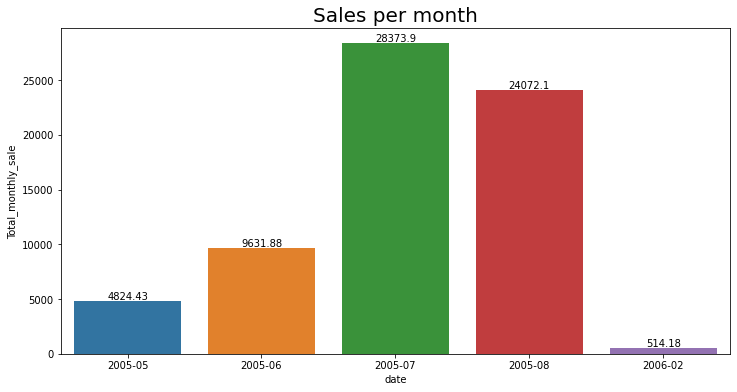

In [197]:
# Plot the above result 
plt.figure(figsize = (12,6))
ax = sns.barplot(x = 'date',y='Total_monthly_sale',data = df)
ax.bar_label(ax.containers[0])
plt.title('Sales per month',fontsize = 20)
plt.show()

**since there are two stores, let's see how much sales each store has generated:**

In [199]:
pd.read_sql('''
    select * 
    from staff''',conn)

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


In [200]:
pd.read_sql('''
    select *
    from payment''',conn).head(2)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57


In [209]:
df = pd.read_sql('''
    select 
    s.store_id,
    sum(p.amount) as Total_sales
    from staff s
    join payment p
    on s.staff_id = p.staff_id
    group by s.store_id
    ''',conn)
df

,store_id,Total_sales
0,1,33489.47
1,2,33927.04


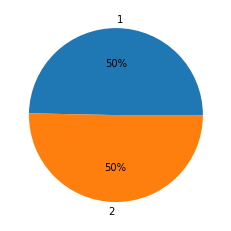

In [217]:
# Plot the above result using pie chart 

labels = ['1','2']
plt.pie(data = df ,x='Total_sales',labels = labels, autopct = '%0.0f%%')
plt.show()

* both the stores are having nearly equal sales